In [9]:
import os, sys
sys.path.append(os.path.abspath('../'))

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [11]:
test_dir = '/Volumes/LIBERZONTAU/grisha_laskin_outlet/'

In [12]:
# %load ./tests/test0.py
#!/usr/bin/python

from vecPy import loadVec
from vecPy import vecPlot
from vecPy.vecPy import vec, vecList


# test_dir = "tests/data"
lst = loadVec.read_directory(test_dir)
lst.sort()
lst


['camera3_LLK300000.T000.D000.P009.H048.L.vec',
 'camera3_LLK300001.T000.D000.P009.H048.L.vec',
 'camera3_LLK300002.T000.D000.P009.H048.L.vec',
 'camera3_LLK300003.T000.D000.P009.H048.L.vec',
 'camera3_LLK300004.T000.D000.P009.H048.L.vec',
 'camera3_LLK300005.T000.D000.P009.H049.L.vec',
 'camera3_LLK300006.T000.D000.P009.H049.L.vec',
 'camera3_LLK300007.T000.D000.P009.H049.L.vec',
 'camera3_LLK300008.T000.D000.P009.H049.L.vec',
 'camera3_LLK300009.T000.D000.P009.H049.L.vec']

In [13]:
dt = loadVec.get_dt(lst[0],test_dir)
resolution = 1.3e-3/67. #[m/px]


vec_array = vecList()

for f in lst[:5]:
    print f
    data = loadVec.get_data(f,test_dir)
    x,y,u,v,chc = loadVec.vecToMatrix(data)
    d = vec(x,y,u,v,chc,dt,lUnits = 'm',tUnits = 's')
    d.scale(resolution)
    d.rotate(-90)#
    vec_array.append(d)
    


camera3_LLK300000.T000.D000.P009.H048.L.vec
camera3_LLK300001.T000.D000.P009.H048.L.vec
camera3_LLK300002.T000.D000.P009.H048.L.vec
camera3_LLK300003.T000.D000.P009.H048.L.vec
camera3_LLK300004.T000.D000.P009.H048.L.vec


(-0.050000000000000003, 0.0, 0.014999999999999999, 0.044999999999999998)

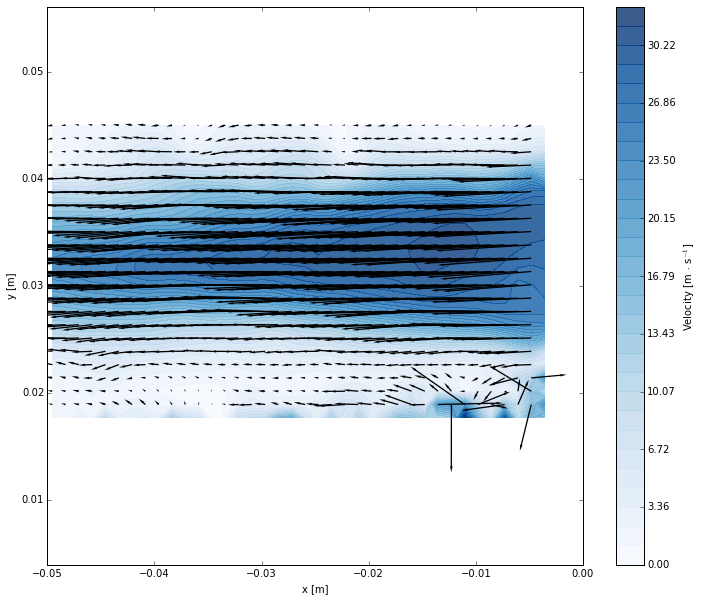

In [14]:
av = vec_array.average()
figure(figsize=(12,10))
vecPlot.genQuiver(av, arrScale = 5.0, threshold = None, nthArr = 1, contourLevels = None)
axis('equal')


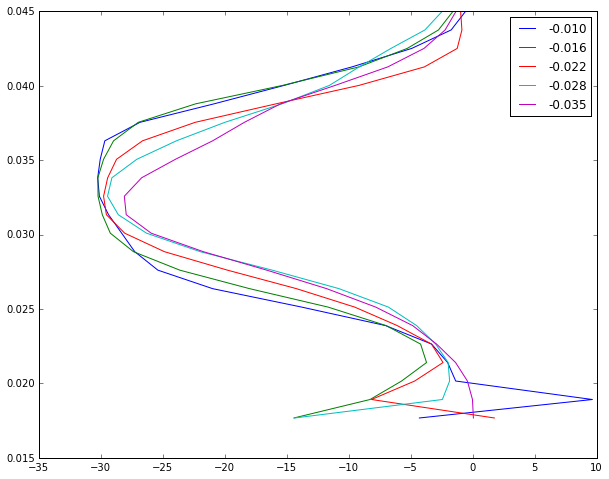

In [15]:
# plot velocity profiles at various x locations
figure(figsize=(10,8))
for i in arange(5,30,5):
    plot(av.u[i,:],av.y[15,:],label="{:4.3f}".format(av.x[i,0]))
legend()

camera3_LLK300005.T000.D000.P009.H049.L.vec
camera3_LLK300006.T000.D000.P009.H049.L.vec
camera3_LLK300007.T000.D000.P009.H049.L.vec
camera3_LLK300008.T000.D000.P009.H049.L.vec
camera3_LLK300009.T000.D000.P009.H049.L.vec


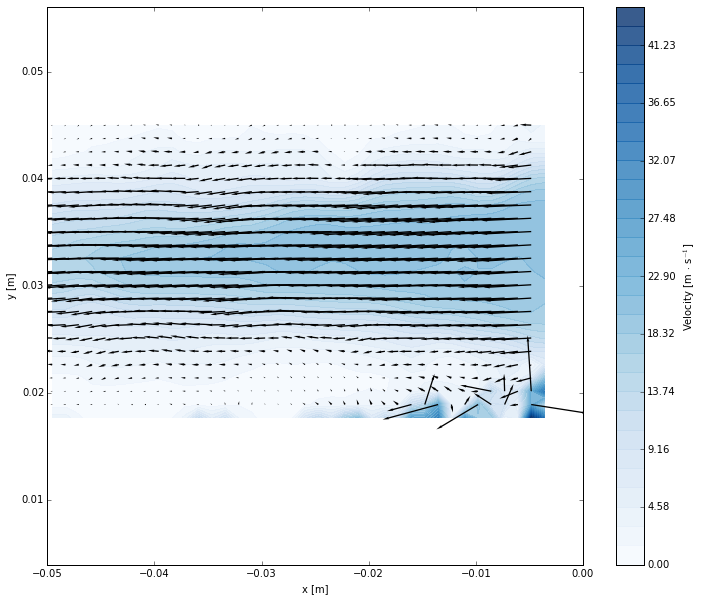

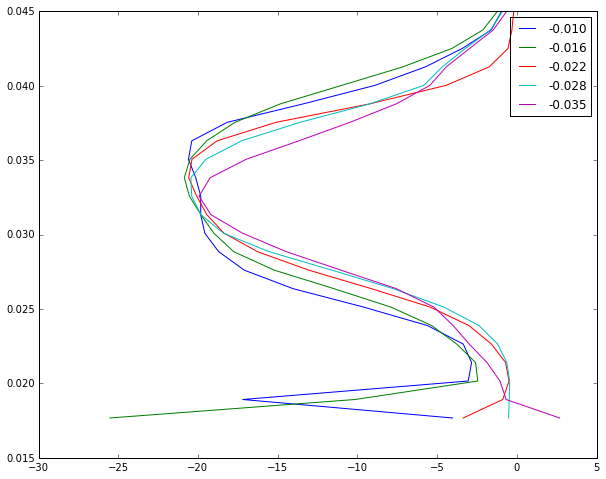

In [16]:
vec_array = vecList()

for f in lst[5:]:
    print f
    data = loadVec.get_data(f,test_dir)
    x,y,u,v,chc = loadVec.vecToMatrix(data)
    d = vec(x,y,u,v,chc,dt,lUnits = 'm',tUnits = 's')
    d.scale(resolution)
    d.rotate(-90)#
    vec_array.append(d)
    
av = vec_array.average()
figure(figsize=(12,10))
vecPlot.genQuiver(av, arrScale = 5.0, threshold = None, nthArr = 1, contourLevels = None)
axis('equal')

# plot velocity profiles at various x locations
figure(figsize=(10,8))
for i in arange(5,30,5):
    plot(av.u[i,:],av.y[15,:],label="{:4.3f}".format(av.x[i,0]))
legend()